In [75]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [76]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# New Section

In [77]:
train.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [78]:
train.shape

(45593, 20)

In [79]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

# Replace "NAN" with np.nan to make it countable

In [116]:
train.replace({"NaN": np.nan}, regex=True, inplace = True)    
test.replace({"NaN": np.nan}, regex=True, inplace = True) 

In [82]:
train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [83]:
from math import radians, cos, sin, asin, sqrt

In [84]:
def distance_calculate(lat1,lon1,lat2,lon2):
  lat1=radians(lat1)
  lon1=radians(lon1)
  lat2=radians(lat2)
  lon2=radians(lon2)
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * asin(sqrt(a))
  r=6371
  return(c * r)

In [85]:
for i in range(len(train)):
  train.loc[i, 'Distance'] = distance_calculate(train.loc[i, 'Restaurant_latitude'],
                                        train.loc[i, 'Restaurant_longitude'],
                                        train.loc[i,'Delivery_location_latitude'],
                                        train.loc[i,'Delivery_location_longitude'])


In [86]:
for i in range(len(test)):
  test.loc[i, 'Distance'] = distance_calculate(test.loc[i, 'Restaurant_latitude'],
                                        test.loc[i, 'Restaurant_longitude'],
                                        test.loc[i,'Delivery_location_latitude'],
                                        test.loc[i,'Delivery_location_longitude'])

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

#EDA

Dealing with Time factor

In [88]:
print (train['Time_taken(min)']) 

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45588    (min) 32
45589    (min) 36
45590    (min) 16
45591    (min) 26
45592    (min) 36
Name: Time_taken(min), Length: 45593, dtype: object


In [89]:
train['Time_taken(min)'] = train['Time_taken(min)'].str[6:].astype(float)
test['Time_taken(min)'] = test['Time_taken(min)'].str[6:].astype(float)

In [90]:
train.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.210138
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,...,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,26.0,4.610365
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,...,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,40.0,16.600361
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,...,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,32.0,20.205253
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,...,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,34.0,19.975520
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,...,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46.0,10.280582


Dealing with Age factor

In [119]:
train['Delivery_person_Age'] = train['Delivery_person_Age'].astype(float)
test['Delivery_person_Age'] = test['Delivery_person_Age'].astype(float)

print(train['Delivery_person_Age'].dtype)


float64


In [120]:
#Filling Null age Values with Avg
train['Delivery_person_Age'].fillna(train['Delivery_person_Age'].mean(), inplace=True)
test['Delivery_person_Age'].fillna(test['Delivery_person_Age'].mean(), inplace=True)


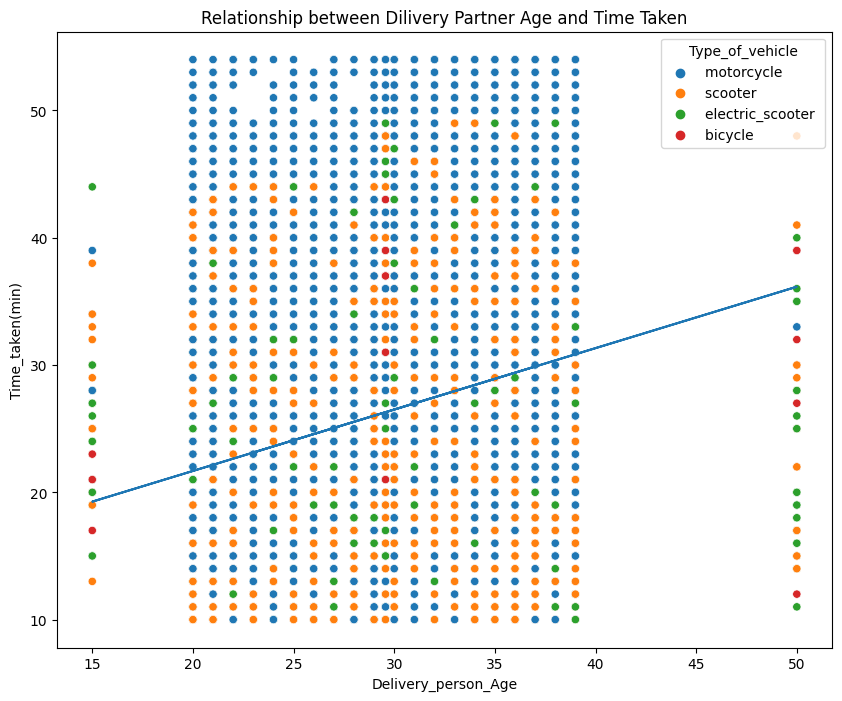

In [93]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data= train,x=train['Delivery_person_Age'],y=train['Time_taken(min)'],hue=train['Type_of_vehicle'])
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken(min)')
plt.title('Relationship between Dilivery Partner Age and Time Taken')

z = np.polyfit(train['Delivery_person_Age'], train['Time_taken(min)'], 1)
p = np.poly1d(z)
plt.plot(train['Delivery_person_Age'], p(train['Delivery_person_Age']))

plt.show()

Drop Unwanted columns

In [121]:
train.drop('ID','Delivery_person_ID','Order_Date',axis = 1,inplace = True)
test.drop('ID','Delivery_person_ID','Order_Date',axis = 1,inplace = True)

C:\Users\Abdal\AppData\Local\Temp\ipykernel_9404\19410876.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('ID','Delivery_person_ID','Order_Date',axis = 1,inplace = True)


TypeError: DataFrame.drop() got multiple values for argument 'axis'

In [ ]:
train.info()

In [95]:
train.isna().sum()

Delivery_person_Age               0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
Distance                          0
dtype: int64

Dealing with Ratings factor

In [122]:
#Change formats to (float)
train['Delivery_person_Ratings']=train['Delivery_person_Ratings'].astype(float)
test['Delivery_person_Ratings']=test['Delivery_person_Ratings'].astype(float)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41616 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41616 non-null  float64
 1   Delivery_person_Ratings      41616 non-null  float64
 2   Restaurant_latitude          41616 non-null  float64
 3   Restaurant_longitude         41616 non-null  float64
 4   Delivery_location_latitude   41616 non-null  float64
 5   Delivery_location_longitude  41616 non-null  float64
 6   Time_Orderd                  41616 non-null  object 
 7   Time_Order_picked            41616 non-null  object 
 8   Weatherconditions            41616 non-null  object 
 9   Road_traffic_density         41616 non-null  object 
 10  Vehicle_condition            41616 non-null  int64  
 11  Type_of_order                41616 non-null  object 
 12  Type_of_vehicle              41616 non-null  object 
 13  multiple_deliver

In [123]:
# Fill null values with variance
train['Delivery_person_Ratings'].fillna(train['Delivery_person_Ratings'].var(), inplace=True)
test['Delivery_person_Ratings'].fillna(test['Delivery_person_Ratings'].var(), inplace=True)

In [125]:
def fix_ratings(data):
    data.loc[data['Delivery_person_Ratings'] > 5, 'Delivery_person_Ratings'] = data['Delivery_person_Ratings'].var()
    data.loc[data['Delivery_person_Ratings'] < 0, 'Delivery_person_Ratings'] = data['Delivery_person_Ratings'].var()
    return data
train = fix_ratings(train)
test = fix_ratings(test)


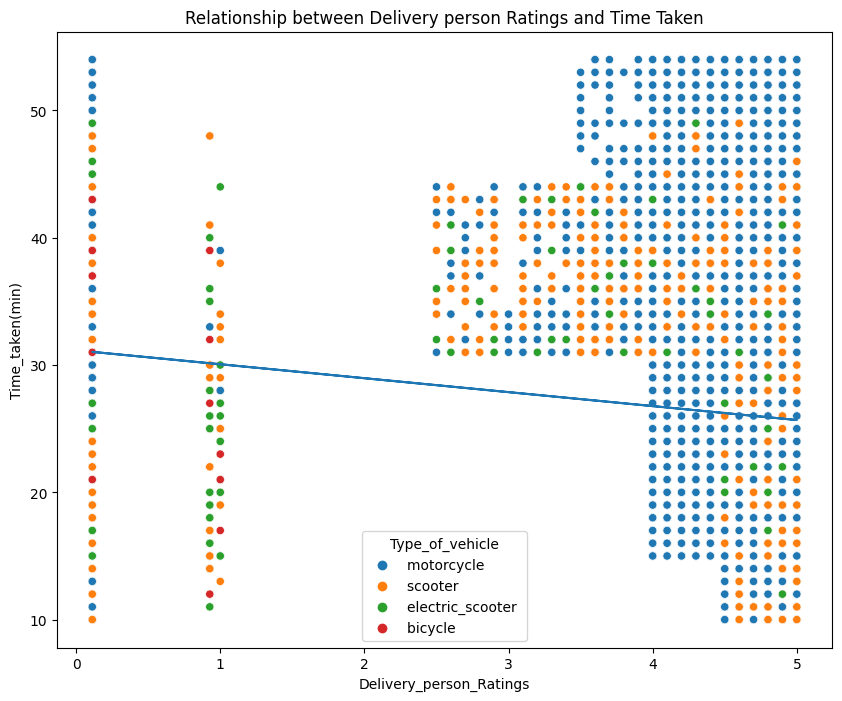

In [99]:
Ratings = train['Delivery_person_Ratings']

plt.figure(figsize=(10, 8))
sns.scatterplot(data= train,x=Ratings,y=train['Time_taken(min)'],hue=train['Type_of_vehicle'])
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time_taken(min)')
plt.title('Relationship between Delivery person Ratings and Time Taken')

z = np.polyfit(Ratings, train['Time_taken(min)'], 1)
p = np.poly1d(z)
plt.plot(Ratings, p(Ratings))



plt.show()

In [100]:
train.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
Distance                          0
dtype: int64

In [101]:
train[train.isnull().any(axis=1)]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
17,34.000000,4.900000,17.426228,78.407495,17.496228,78.477495,20:40:00,20:50:00,conditions Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41.0,10.757109
42,29.567137,0.112035,19.121999,72.908493,19.201999,72.988493,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,33.0,12.236724
58,32.000000,4.500000,26.888420,75.800689,26.898420,75.810689,09:25:00,09:40:00,conditions Windy,Low,2,Buffet,scooter,0,No,NaN,20.0,1.489927
74,29.567137,0.112035,12.935662,77.614130,12.975662,77.654130,NaN,15:30:00,NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,19.0,6.210590
86,39.000000,4.800000,18.516216,73.842527,18.566216,73.892527,21:55:00,22:10:00,conditions Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,28.0,7.661331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45518,29.567137,0.112035,22.727021,75.884167,22.737021,75.894167,NaN,11:40:00,NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,25.0,1.512692
45519,29.567137,0.112035,27.160934,78.044095,27.170934,78.054095,NaN,09:05:00,NaN,NaN,3,Meal,electric_scooter,1,No,Urban,17.0,1.488329
45550,23.000000,4.600000,22.753659,75.903365,22.763659,75.913365,08:40:00,08:45:00,conditions Cloudy,Low,2,Snack,scooter,1,No,NaN,12.0,1.512556
45566,29.567137,0.112035,21.185047,72.808590,21.205047,72.828590,NaN,10:50:00,conditions Windy,Low,2,Meal,scooter,0,No,Urban,12.0,3.040555


<AxesSubplot: xlabel='Type_of_order', ylabel='count'>

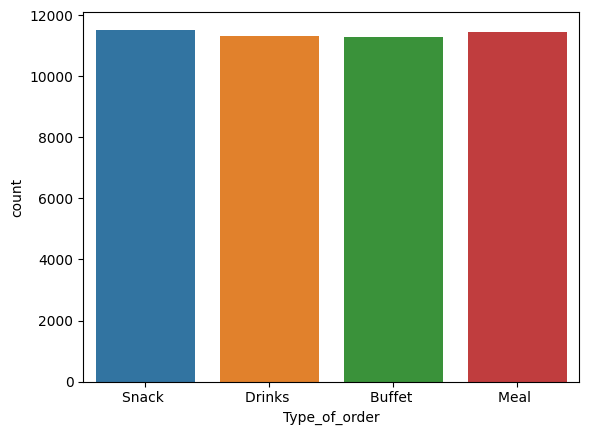

In [102]:
sns.countplot(data=train,x=train['Type_of_order'])


<AxesSubplot: xlabel='Type_of_order', ylabel='count'>

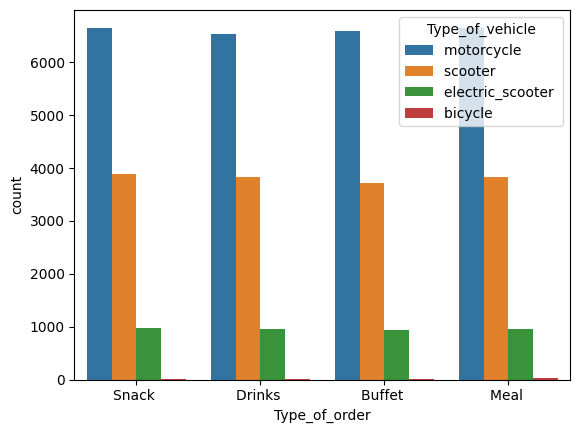

In [103]:
sns.countplot(x=train['Type_of_order'],hue=train['Type_of_vehicle'])

In [126]:
#drop null values from traffic density
train = train.dropna(subset=['Road_traffic_density'])
test = test.dropna(subset=['Road_traffic_density'])

<AxesSubplot: xlabel='Road_traffic_density', ylabel='count'>

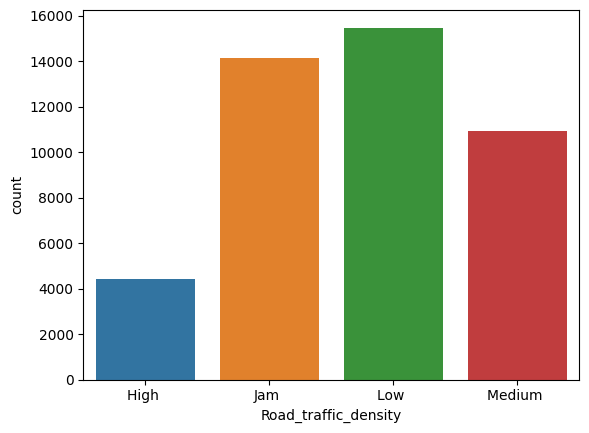

In [105]:
sns.countplot(x=train['Road_traffic_density'])

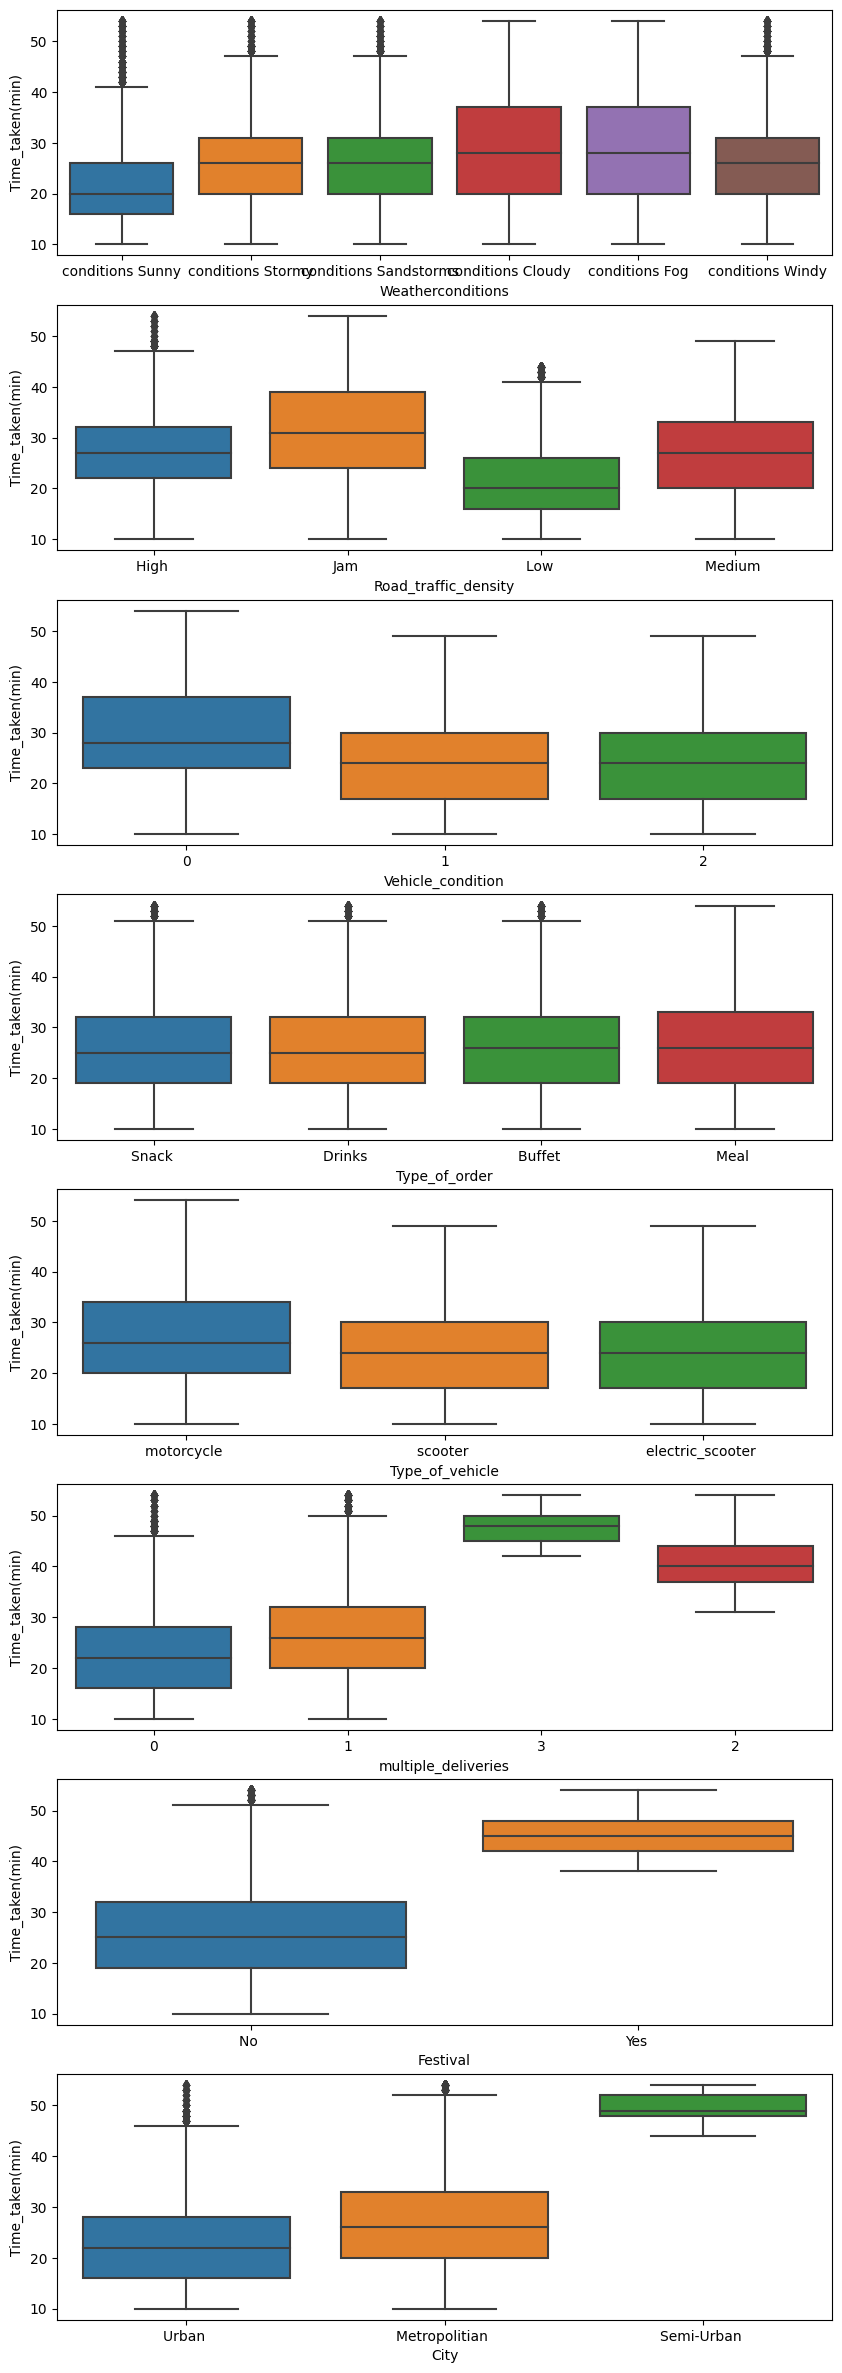

In [106]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(10,30), dpi=100)
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=train, ax=ax1)
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=train, ax=ax2)
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=train, ax=ax3)
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=train, ax=ax4)
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=train, ax=ax5)
sns.boxplot(x='multiple_deliveries', y='Time_taken(min)', data=train, ax=ax6)
sns.boxplot(x='Festival', y='Time_taken(min)', data=train, ax=ax7)
sns.boxplot(x='City', y='Time_taken(min)', data=train, ax=ax8)
plt.show()

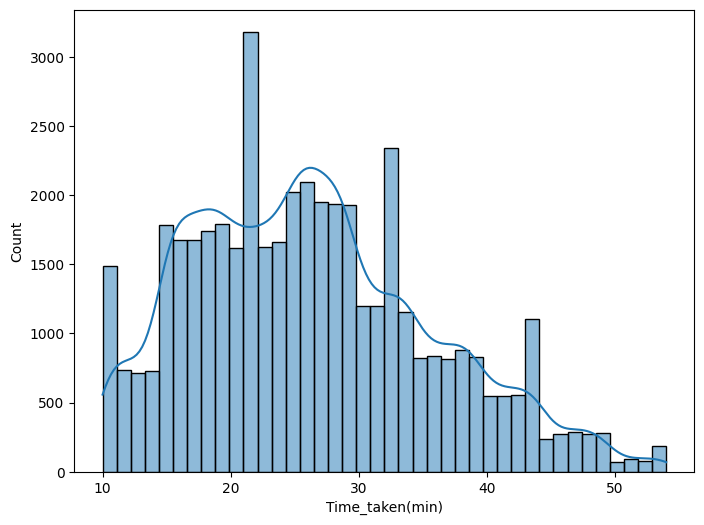

In [107]:

#sns.countplot(x=train['Weatherconditions'])
plt.figure(figsize=(8,6), dpi=100)
sns.histplot(train['Time_taken(min)'], bins=40, kde=True)
plt.show()
plt.show()

Dealing with Time_Orderd factor

In [108]:
train['Time_Orderd'].head()

0    11:30:00
1    19:45:00
2    08:30:00
3    18:00:00
4    13:30:00
Name: Time_Orderd, dtype: object

In [127]:
#drop all records with null Time_Orderd 
train = train.dropna(subset=['Time_Orderd','Road_traffic_density','City','multiple_deliveries','Festival'])
test = train.dropna(subset=['Time_Orderd','Road_traffic_density','City','multiple_deliveries','Festival'])


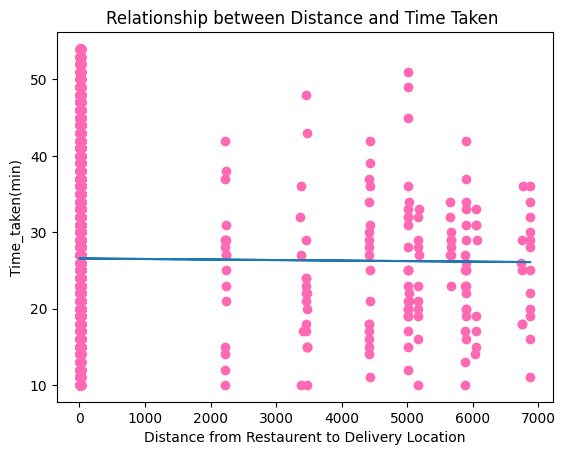

In [110]:
x=train['Distance']
y=train['Time_taken(min)']
plt.scatter(x,y,color = 'hotpink')
plt.xlabel("Distance from Restaurent to Delivery Location")
plt.ylabel("Time_taken(min)")
plt.title("Relationship between Distance and Time Taken ")
5
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


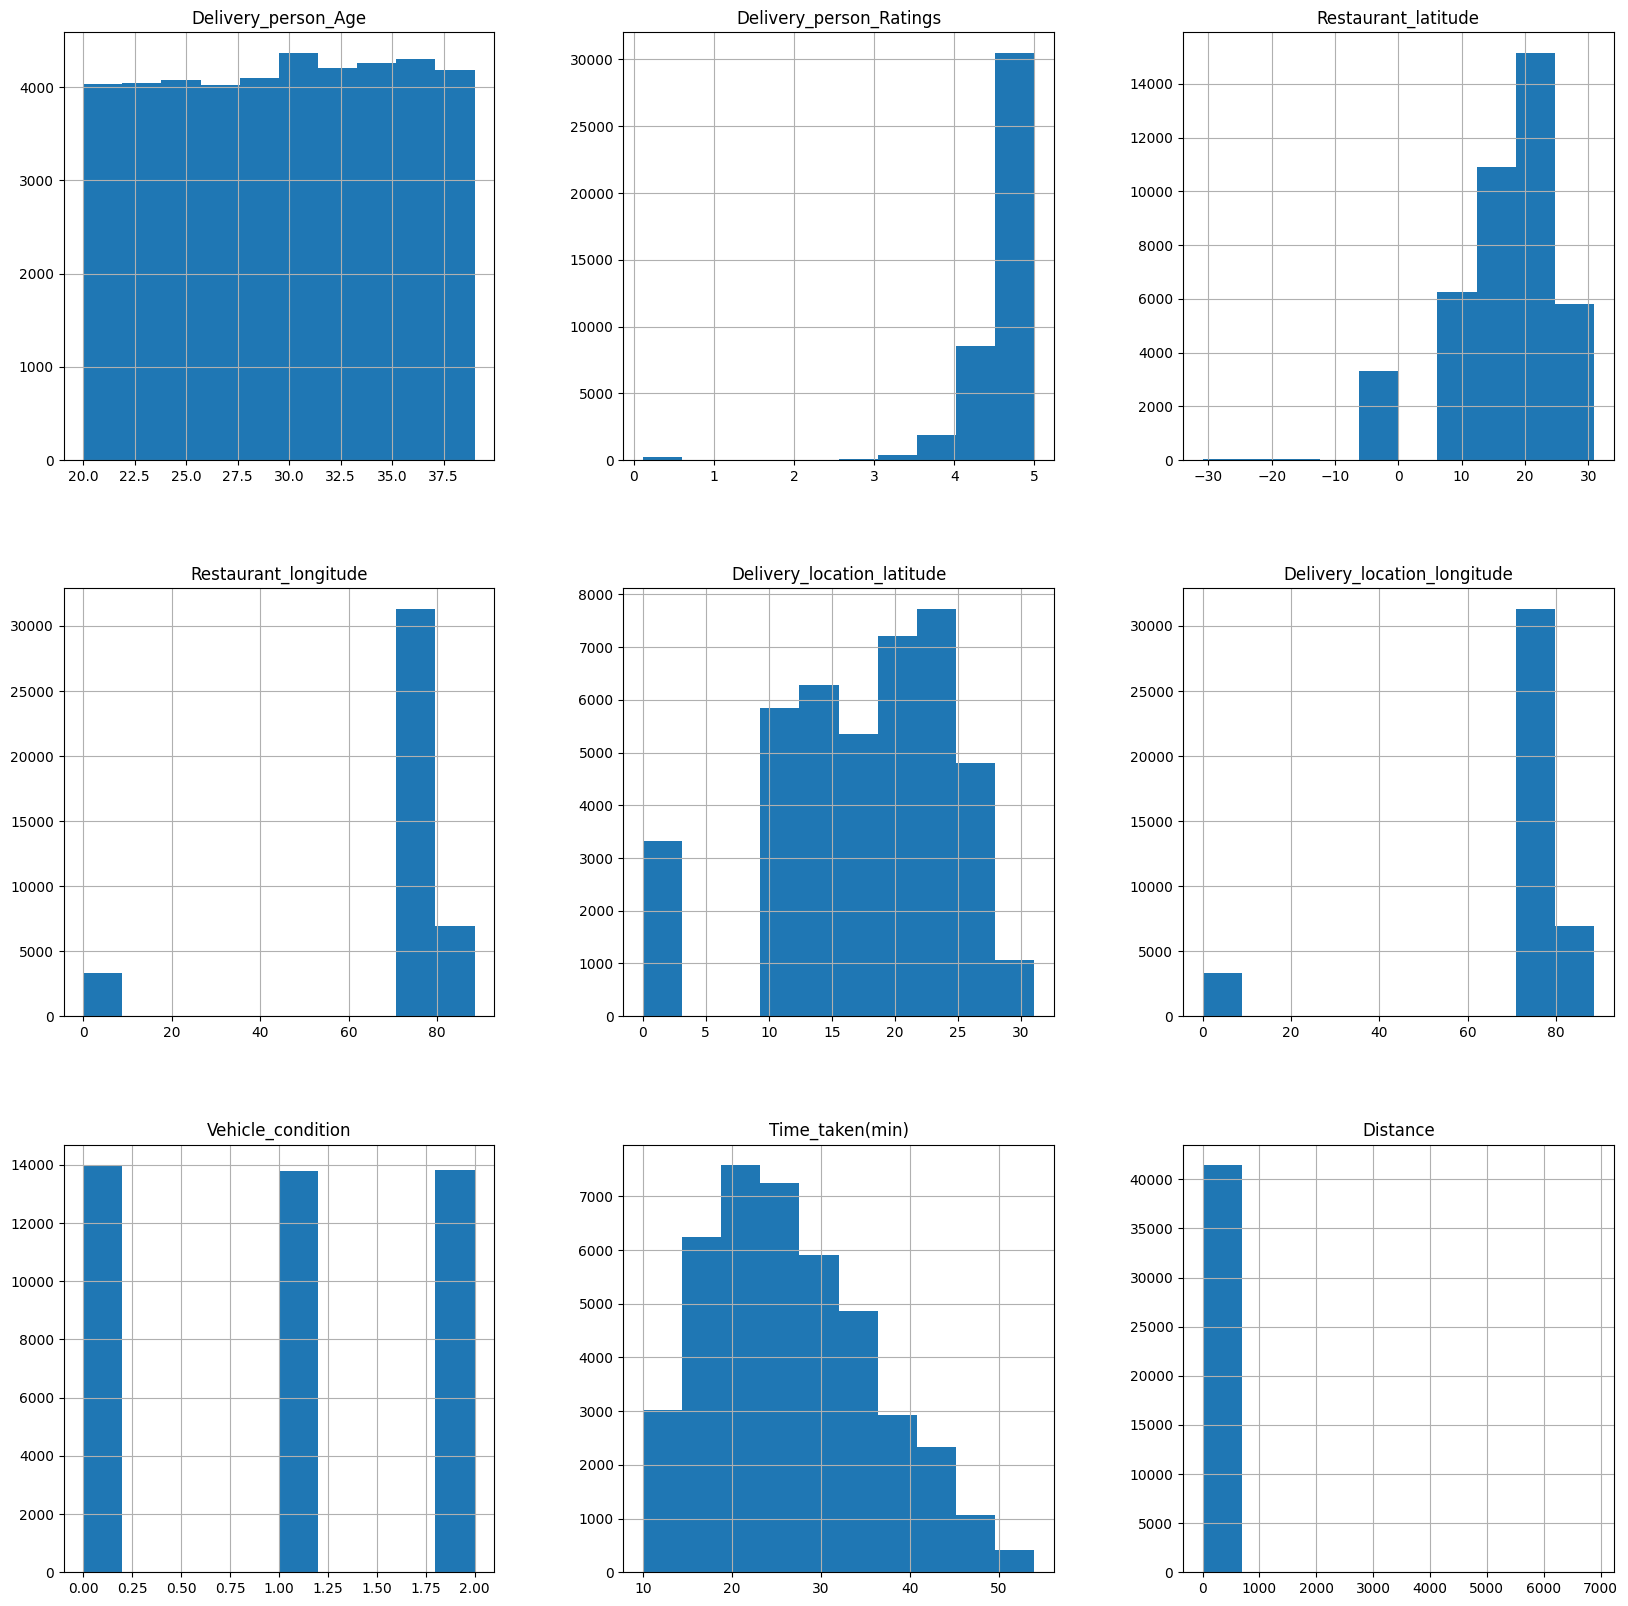

In [113]:
p = train.hist(figsize = (20,20))

In [133]:
def clean(data):
    
    #data.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
    data.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
             'Time_Order_picked'], axis=1, inplace=True)


    num_cols = ["multiple_deliveries", "Festival"]
    str_cols = ["Road_traffic_density", "Weatherconditions", "City"]
    age = ['Delivery_person_Age']
    rating = ['Delivery_person_Ratings']
    order_time = ['']
    for col in num_cols:
        data[col].fillna(data[col].mode(), inplace=True)

    for col in str_cols:
        data[col].fillna(data[col].mode(), inplace=True)    
    
    data[age].fillna(data[age].mean(), inplace=True)
    #data[age]=data[age].fillna(data[age].mode(), inplace=True)
    #data[rating]=data[rating].fillna(data[rating].var())
    
    return data


In [134]:
test= clean(test)
train.head()

C:\Users\Abdal\AppData\Local\Temp\ipykernel_9404\4032829606.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[age].fillna(data[age].mean(), inplace=True)


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.210138


In [ ]:
train = clean(train)

In [135]:
#Dummy values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Type_of_vehicle", "Type_of_order","Road_traffic_density", "Weatherconditions", "City"]

for col in columns:
    train[col] = le.fit_transform(train[col])
    print(le.classes_)

['electric_scooter ' 'motorcycle ' 'scooter ']
['Buffet ' 'Drinks ' 'Meal ' 'Snack ']
['High ' 'Jam ' 'Low ' 'Medium ']
['conditions Cloudy' 'conditions Fog' 'conditions Sandstorms'
 'conditions Stormy' 'conditions Sunny' 'conditions Windy']
['Metropolitian ' 'Semi-Urban ' 'Urban ']


In [136]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,4,0,2,3,1,0,No,2,24.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,3,1,2,3,2,1,No,0,33.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,2,2,0,1,1,1,No,2,26.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,4,3,0,0,1,1,No,0,21.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,0,0,1,3,2,1,No,0,30.0,6.210138


In [137]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [142]:
from sklearn.model_selection import train_test_split
x = np.array(train[['Delivery_person_Age','Delivery_person_Ratings','Distance']])
y = np.array(train[['Time_taken(min)']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.15, random_state=50)

model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape = (xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
35373/35373 [==============================] - 124s 3ms/step - loss: 70.8390
Epoch 2/9
35373/35373 [==============================] - 119s 3ms/step - loss: 63.1043
Epoch 3/9
35373/35373 [==============================] - 119s 3ms/step - loss: 60.0544
Epoch 4/9
35373/35373 [==============================] - 117s 3ms/step - loss: 58.9684
Epoch 5/9
35373/35373 [==============================] - 118s 3ms/step - loss: 58.2251
Epoch 6/9
35373/35373 [==============================] - 126s 4ms/step - loss: 57.8175
Epoch 7/9
35373/35373 [==============================] - 141s 4ms/step - loss: 57.3519
Epoch 8/9
35373/35373 [==============================] - 140s 4ms/step - loss: 56.9459
Epoch 9/9
35373/35373 [==============================] - 137s 4ms/step - loss: 56.9431


In [149]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries(1-5): "))
c = float(input("Total Distance in (KM): "))
features = np.array([[a, b, c]])
print("Predicted Delivery time in Minutes= ",model.predict(features))


Food Delivery Time Prediction
1/1 [==============================] - 1s 899ms/step
Predicted Delivery time in Minutes=  [[34.327015]]
